**Problem Statement**

We will be trying to understand sentiment of tweets about the company Apple. By using the twitter data we can hope to understand the public perception a bit better.

Our challenge is to see if we can correctly classify tweets as being either positive or negative.

Problem Statement:
•	Correctly classify the tweets as being positive or negative.

# Using: nltk.NaiveBayesClassifier

In [67]:
## Importing the necessary libraries along with the standard import

import numpy as np 
import pandas as pd 
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib

In [68]:
## Let us check the version of the various libraries
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Regular Expression version:',re.__version__)
print('Natural Language Tool Kit version:',nltk.__version__)
print('Matplotlib version:',matplotlib.__version__)

Numpy version: 2.1.1
Pandas version: 2.2.2
Regular Expression version: 2.2.1
Natural Language Tool Kit version: 3.8.1
Matplotlib version: 3.9.2


Load the csv file available in the working or specified directory

In [112]:
## Loading the dataset

import os
Apple_tweets = pd.read_csv(r"Apple_tweets.csv")

In [113]:
## Checking the first 5 rows of the dataset

Apple_tweets.head()

,Tweet,Avg
0,"I have to say, Apple has by far the best custo...",2.0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2.0
2,LOVE U @APPLE,1.8
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1.8
4,.@apple has the best customer service. In and ...,1.8


In [114]:
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].str.replace(r'[^\w\s]', '', regex=True)
#\w: Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
#\s: Returns a match where the string contains a white space character.
#[^]: Returns a match for any character EXCEPT what is written after it.
Apple_tweets

,Tweet,Avg
0,I have to say Apple has by far the best custom...,2.0
1,iOS 7 is so fricking smooth beautiful ThanxAp...,2.0
2,LOVE U APPLE,1.8
3,Thank you apple loving my new iPhone 5S apple...,1.8
4,apple has the best customer service In and out...,1.8
...,...,...
1176,freak apple,-2.0
1177,WHY CANT I freakING SEE PICTURES ON MY TL IM A...,-2.0
1178,APPLE YOU freakING COWS freak YOU,-2.0
1179,apple I hate you why is my phone not working I...,-2.0


In [115]:
## Converting all the words to lower case

Apple_tweets['Tweet'] = Apple_tweets['Tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Apple_tweets

,Tweet,Avg
0,i have to say apple has by far the best custom...,2.0
1,ios 7 is so fricking smooth beautiful thanxapp...,2.0
2,love u apple,1.8
3,thank you apple loving my new iphone 5s apple ...,1.8
4,apple has the best customer service in and out...,1.8
...,...,...
1176,freak apple,-2.0
1177,why cant i freaking see pictures on my tl im a...,-2.0
1178,apple you freaking cows freak you,-2.0
1179,apple i hate you why is my phone not working i...,-2.0


In [116]:
## We are defining a function to convert the 'Avg' column into a column with two classes which will be treated as the
## target variable

def Tweet(x): #naming the function to be 'Tweet' which will take an input 'x'
    if x >= 0: # initialising a conditional statement for the input greater than or equal to 0
        return "Positive" # if the conditional statement is satisfied, the function will return the string 'Positive'
    else: 
        return "Negative" # if the conditional statement is not satisfied, the function will return the string 'Negative'

In [117]:
# Applying the defined function on the column 'Avg' and creating a new column called 'Sentiment'
Apple_tweets["Sentiment"] = Apple_tweets["Avg"].apply(Tweet)

# Dropping the 'Avg' column from the data frame
Apple_tweets.drop("Avg",axis=1,inplace=True)

In [118]:
Apple_tweets

,Tweet,Sentiment
0,i have to say apple has by far the best custom...,Positive
1,ios 7 is so fricking smooth beautiful thanxapp...,Positive
2,love u apple,Positive
3,thank you apple loving my new iphone 5s apple ...,Positive
4,apple has the best customer service in and out...,Positive
...,...,...
1176,freak apple,Negative
1177,why cant i freaking see pictures on my tl im a...,Negative
1178,apple you freaking cows freak you,Negative
1179,apple i hate you why is my phone not working i...,Negative


We see that the newly created 'Sentiment' variable has all the positive entries one after the other and all the negative entries after. Since we need to split the data into training and test randomly we have to jumble up the data set.

###### Note: We are not using the train-test split function from sklearn and hence the need to jumble the data set.

In [120]:
Apple_tweets=Apple_tweets.sample(frac=1,random_state=3).reset_index().drop("index",axis=1)
#pd.sample()=Return a random sample of items from an axis of object.
#random_state:we used random_state for reproducibility.
#frac=1: is used to generate random sample for whole of the dataset.
#Reset_index: To reset the index as it got shuffled.
#Drop: We used it to drop the previous index

In [121]:
Apple_tweets.head()

,Tweet,Sentiment
0,securitycompass apple,Positive
1,quelquun peutil expliquer a apple ce quest le ...,Negative
2,disappointing rt joconfino nothing short of a ...,Negative
3,electrafood twitter apple me to ugh,Positive
4,we have something that you wish you had called...,Positive


In [122]:
all_Words=[x for x in pd.Series(' '.join(Apple_tweets['Tweet']).split())] 
# 1st we are spliting each row of the dataframe into words.
# 2nd we are joining all the above words with a space between them.
# 3rd we are making a Series out of it.
# 4th we are extracting each word one by one and storing it in the variable all_Words.

In [123]:
all_Words

['securitycompass',
 'apple',
 'quelquun',
 'peutil',
 'expliquer',
 'a',
 'apple',
 'ce',
 'quest',
 'le',
 'low',
 'cost',
 'apple',
 'disappointing',
 'rt',
 'joconfino',
 'nothing',
 'short',
 'of',
 'a',
 'disgrace',
 'apple',
 'facebook',
 'amazon',
 'refuse',
 '2',
 'divulge',
 'co2',
 'httpbitly18xc8dk',
 'cc',
 'cdproject',
 'electrafood',
 'twitter',
 'apple',
 'me',
 'to',
 'ugh',
 'we',
 'have',
 'something',
 'that',
 'you',
 'wish',
 'you',
 'had',
 'called',
 'bbm',
 'thats',
 'why',
 'ichooseblackberry10',
 'bbm4all',
 'blackberry',
 'apple',
 'google',
 'johan_barnard',
 'hahaha',
 'some',
 'people',
 'just',
 'have',
 'too',
 'much',
 'time',
 'android',
 'vs',
 'apple',
 'again',
 'pictwittercomymgc0ugkoa',
 'apple',
 'announces',
 'iphone',
 '5s',
 'iphone',
 '5c',
 'ios',
 '7',
 'release',
 'date',
 'thoughts',
 'undefined',
 'apple',
 'shopbreamall',
 'php',
 'katanya',
 'low',
 'cost',
 'apple',
 'darrensproat',
 'nokia',
 'apple',
 'dont',
 'forget',
 'its',
 'i

In [124]:
nltk.FreqDist(all_Words)

FreqDist({'apple': 1297, 'the': 489, 'to': 326, 'iphone': 257, 'i': 251, 'a': 238, 'is': 209, 'you': 187, 'and': 183, 'for': 145, ...})

In [125]:
nltk.FreqDist(all_Words).most_common(10)

[('apple', 1297),
 ('the', 489),
 ('to', 326),
 ('iphone', 257),
 ('i', 251),
 ('a', 238),
 ('is', 209),
 ('you', 187),
 ('and', 183),
 ('for', 145)]

In [126]:
# Defining a variable 'stopwords' which contains the list of punctuations from the string library and the english stopwords
# from nltk
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

# Converting all the words to lower case
all_words = (x.lower() for x in all_Words)# we can skip this line since we have already converted all the words to lowercase
# Only keeping the words which are not the 'stopwords'
all_words_clean = [word for word in all_Words if word not in stopwords]


# Creating a frequency distribution of the lower case words which does not contain any stopwords
all_words_freq = nltk.FreqDist(all_words_clean)

# Extracting the  most common 2000 words after the list of words have been converted to lowercase and the stopwords are removed.
word_features = [item[0] for item in all_words_freq.most_common(2000)]

In [127]:
word_features

['apple',
 'iphone',
 'new',
 '5s',
 'ipad',
 'itunes',
 'phone',
 'ipod',
 'get',
 'ipodplayerpromo',
 '5c',
 'im',
 'dont',
 'like',
 'promoipodplayerpromo',
 'itune',
 'app',
 'de',
 'rt',
 'ios',
 'freak',
 'make',
 'store',
 'one',
 'iphone5c',
 'iphone5s',
 'apples',
 '5',
 'u',
 'iphones',
 'time',
 'really',
 'need',
 'would',
 'google',
 'fingerprint',
 'microsoft',
 'think',
 '7',
 'samsung',
 'thanks',
 'ios7',
 'android',
 'want',
 'cant',
 'twitter',
 'well',
 'us',
 'lol',
 'please',
 'back',
 'promo',
 'via',
 'better',
 'love',
 'anyone',
 'hate',
 'use',
 'still',
 'battery',
 'come',
 'know',
 'thats',
 'look',
 'buy',
 'wont',
 'devices',
 'next',
 'people',
 'going',
 'yall',
 'hey',
 'good',
 'go',
 'update',
 'making',
 '2',
 'release',
 'dear',
 'sure',
 'every',
 'let',
 'service',
 'mobile',
 'give',
 'year',
 'apps',
 'nokia',
 'free',
 'help',
 'news',
 'using',
 'cheap',
 'wtf',
 'freaking',
 'could',
 'facebook',
 'much',
 'work',
 'got',
 'doesnt',
 'yet',

In [128]:
## We are defining a function to appropriately process the text document

def document_features(document): # we are naming the function as document_features
    document_words = set(document) #getting the unique number of entries in the document variable
    features = {} #defining an empty dictionary
    for word in word_features: #looping over the 'word_features' which has been defined in the last code block
        features['contains({})'.format(word)] = (word in document_words) #defining 'features' in  particular format
        # and checking whether the unique elements of the input 'document' are contained in the 'word_features' 
        # defined before
    return features

In [169]:
nltk.download('punkt')

frame = Apple_tweets.copy() #storing Apple_tweets in another variables
frame.columns = ["feature", "label"] # defning the names of the colummn of the data frame 'frame'
frame['feature'] = frame.apply(lambda row: nltk.word_tokenize(str(row['feature'])), axis=1) #the features of the 'frame' data frame are stored in the variable 'feature'
# In the above code snippet we are tokenizing the variables
frame['label'] = frame.label # the labels of the 'frame' data frame are stored in the variable 'label'

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Elise\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [171]:
Apple_tweets

,Tweet,Sentiment
0,securitycompass apple,Positive
1,quelquun peutil expliquer a apple ce quest le ...,Negative
2,disappointing rt joconfino nothing short of a ...,Negative
3,electrafood twitter apple me to ugh,Positive
4,we have something that you wish you had called...,Positive
...,...,...
1176,i dont like ios7 theyre changing the look of e...,Negative
1177,apple discontinues cards app and printing serv...,Negative
1178,the only thing im asking from apple is a water...,Positive
1179,ugh literally once a day my phone just spazzes...,Negative


In [172]:
frame

,feature,label
0,"[securitycompass, apple]",Positive
1,"[quelquun, peutil, expliquer, a, apple, ce, qu...",Negative
2,"[disappointing, rt, joconfino, nothing, short,...",Negative
3,"[electrafood, twitter, apple, me, to, ugh]",Positive
4,"[we, have, something, that, you, wish, you, ha...",Positive
...,...,...
1176,"[i, dont, like, ios7, theyre, changing, the, l...",Negative
1177,"[apple, discontinues, cards, app, and, printin...",Negative
1178,"[the, only, thing, im, asking, from, apple, is...",Positive
1179,"[ugh, literally, once, a, day, my, phone, just...",Negative


In [173]:
frame['feature'][1]

['quelquun',
 'peutil',
 'expliquer',
 'a',
 'apple',
 'ce',
 'quest',
 'le',
 'low',
 'cost',
 'apple']

In [174]:
## We are defining our combined data frame which we will split into training and test before fitting a classifier

# We are creating a list of the entries of which are a tuple. We are appending the list with tuples whose entries are the 
# pre-processed tweets and the corresponding sentiment attached to it.
featuresets = [(document_features(feature), label) for index, (feature, label) in frame.iterrows()]

In [175]:
featuresets[0]

({'contains(apple)': True,
  'contains(iphone)': False,
  'contains(new)': False,
  'contains(5s)': False,
  'contains(ipad)': False,
  'contains(itunes)': False,
  'contains(phone)': False,
  'contains(ipod)': False,
  'contains(get)': False,
  'contains(ipodplayerpromo)': False,
  'contains(5c)': False,
  'contains(im)': False,
  'contains(dont)': False,
  'contains(like)': False,
  'contains(promoipodplayerpromo)': False,
  'contains(itune)': False,
  'contains(app)': False,
  'contains(de)': False,
  'contains(rt)': False,
  'contains(ios)': False,
  'contains(freak)': False,
  'contains(make)': False,
  'contains(store)': False,
  'contains(one)': False,
  'contains(iphone5c)': False,
  'contains(iphone5s)': False,
  'contains(apples)': False,
  'contains(5)': False,
  'contains(u)': False,
  'contains(iphones)': False,
  'contains(time)': False,
  'contains(really)': False,
  'contains(need)': False,
  'contains(would)': False,
  'contains(google)': False,
  'contains(fingerprint

In [176]:
# Train Naive Bayes classifier
train_set, test_set = featuresets[0:int(len(featuresets)*0.7)], featuresets[int(len(featuresets)*0.7):]

classifier = nltk.NaiveBayesClassifier.train(train_set)

In [177]:
#Normal 70:30 ratio function

In [178]:
print(nltk.classify.accuracy(classifier, test_set))

0.6732394366197183


# Alternate Way: using Naive Bayes Classifier.
Now, let us reload the data and look at a few other text mining functionalities that Python offers us and then go on to fit a classifier algorithm.

In [209]:
## Loading the dataset

import os

Apple_tweets = pd.read_csv(r"Apple_tweets.csv")

## Basic Exploration in Text Mining

### Number of words

**To create a temporary function lambda can be used. These functions do not require a name like a def function, however the output is same as defining a permanent function**
**As these function are temporary, memory comsumption is less in comparison to permanent function. Also there are multiple ways to get a similar output**


In [213]:
## Let's get a word count without writing a lambda function

Apple_tweets['totalwords'] = [len(x.split()) for x in Apple_tweets['Tweet'].tolist()]
Apple_tweets[['Tweet','totalwords']].head()

,Tweet,totalwords
0,"I have to say, Apple has by far the best custo...",19
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,10
2,LOVE U @APPLE,3
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",11
4,.@apple has the best customer service. In and ...,16


In [214]:
Apple_tweets['word_count'] = Apple_tweets['Tweet'].apply(lambda x: len(str(x).split(" ")))
Apple_tweets[['Tweet','word_count']].head()

,Tweet,word_count
0,"I have to say, Apple has by far the best custo...",19
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,10
2,LOVE U @APPLE,3
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",12
4,.@apple has the best customer service. In and ...,16


### Number of Characters- including spaces

In [216]:
Apple_tweets['char_count'] = Apple_tweets['Tweet'].str.len()
Apple_tweets[['Tweet','char_count']].head()

,Tweet,char_count
0,"I have to say, Apple has by far the best custo...",101
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,60
2,LOVE U @APPLE,13
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",91
4,.@apple has the best customer service. In and ...,82


In [217]:
Apple_tweets['Tweet'][0]

'I have to say, Apple has by far the best customer care service I have ever received! @Apple @AppStore'

In [218]:
len(Apple_tweets['Tweet'][0])

101

### Average Word Length

In [220]:
def avg_word(sentence):
    words = sentence.split() #splitting the words separately from the input taken
    return (sum(len(word) for word in words)/len(words)) # getting the average number of words in the each of the entries

Apple_tweets['avg_word'] = Apple_tweets['Tweet'].apply(lambda x: avg_word(x))
Apple_tweets[['Tweet','avg_word']].head()

,Tweet,avg_word
0,"I have to say, Apple has by far the best custo...",4.368421
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,5.100000
2,LOVE U @APPLE,3.666667
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",7.272727
4,.@apple has the best customer service. In and ...,4.187500


### Number of stop Words

In [222]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

Apple_tweets['stopwords'] = Apple_tweets['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
Apple_tweets[['Tweet','stopwords']].head()

,Tweet,stopwords
0,"I have to say, Apple has by far the best custo...",6
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2
2,LOVE U @APPLE,0
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",2
4,.@apple has the best customer service. In and ...,8


### Number of special character

In [224]:
Apple_tweets['hashtags'] = Apple_tweets['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
Apple_tweets[['Tweet','hashtags']].head()

,Tweet,hashtags
0,"I have to say, Apple has by far the best custo...",0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,1
2,LOVE U @APPLE,0
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",2
4,.@apple has the best customer service. In and ...,0


### Number of numerics

In [226]:
Apple_tweets['numerics'] = Apple_tweets['Tweet'].apply(lambda x: len(re.findall(r'[0-9]',x)))
Apple_tweets[['Tweet','numerics']].head()

,Tweet,numerics
0,"I have to say, Apple has by far the best custo...",0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,1
2,LOVE U @APPLE,0
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",3
4,.@apple has the best customer service. In and ...,2


### Number of Uppercase Words

In [228]:
Apple_tweets['upper'] = Apple_tweets['Tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
Apple_tweets[['Tweet','upper']].head()

,Tweet,upper
0,"I have to say, Apple has by far the best custo...",2
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,0
2,LOVE U @APPLE,3
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1
4,.@apple has the best customer service. In and ...,0


### Number of Uppercase Letters

In [230]:
Apple_tweets['upper_letter'] = Apple_tweets['Tweet'].apply(lambda x: len(re.findall(r'[A-Z]',x)))
Apple_tweets[['Tweet','upper_letter']].head()

,Tweet,upper_letter
0,"I have to say, Apple has by far the best custo...",6
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,5
2,LOVE U @APPLE,10
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",9
4,.@apple has the best customer service. In and ...,1


## Basic Pre-Processing

### Lower Case conversion

In [233]:
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Apple_tweets['Tweet'].head()

0    i have to say, apple has by far the best custo...
1    ios 7 is so fricking smooth & beautiful!! #tha...
2                                        love u @apple
3    thank you @apple, loving my new iphone 5s!!!!!...
4    .@apple has the best customer service. in and ...
Name: Tweet, dtype: object

### Removal of Punctuation

In [235]:
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].str.replace('[^\w\s]','')
#\w: Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
#\s: Returns a match where the string contains a white space character.
#[^]: Returns a match for any character EXCEPT what is written after it.
Apple_tweets['Tweet'].head()

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Elise\AppData\Local\Temp\ipykernel_11012\3270311021.py:1: SyntaxWarning: invalid escape sequence '\w'
  Apple_tweets['Tweet'] = Apple_tweets['Tweet'].str.replace('[^\w\s]','')


0    i have to say, apple has by far the best custo...
1    ios 7 is so fricking smooth & beautiful!! #tha...
2                                        love u @apple
3    thank you @apple, loving my new iphone 5s!!!!!...
4    .@apple has the best customer service. in and ...
Name: Tweet, dtype: object

### Removal of StopWords

In [237]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Apple_tweets['Tweet'].head()

0    say, apple far best customer care service ever...
1    ios 7 fricking smooth & beautiful!! #thanxappl...
2                                        love u @apple
3    thank @apple, loving new iphone 5s!!!!! #apple...
4      .@apple best customer service. new phone 10min!
Name: Tweet, dtype: object

### Common Words Removal
1. **We will create a list of 10 frequently occuring words and then decide if we need to remove it or retain it.**
2. **Reason is that this file has tweets related to Apple.. So no point in keeping the word like Apple, unless we have tweets from other brands**

In [239]:
freq = pd.Series(' '.join(Apple_tweets['Tweet']).split()).value_counts()[:10]
freq

@apple     1030
iphone      162
new         111
#apple       86
5s           70
#ipod        67
#ipad        66
#itunes      64
#iphone      63
phone        59
Name: count, dtype: int64

In [240]:
freq =['apple','get']

1. **As we are talking about multiple products hence iphone will be kept, similarly some tweets do relate to old products without mentioning the word old, hence even new would be kept in the tweets.**
2. **hence only apple and get would be removed**

In [242]:
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
Apple_tweets['Tweet'].head()

0    say, far best customer care service ever recei...
1    ios 7 fricking smooth & beautiful!! #thanxappl...
2                                        love u @apple
3    thank @apple, loving new iphone 5s!!!!! #apple...
4      .@apple best customer service. new phone 10min!
Name: Tweet, dtype: object

### Rare Words Removal
**This is done as association of these less occurring words with the existing words could be a noise**

In [244]:
freq = pd.Series(' '.join(Apple_tweets['Tweet']).split()).value_counts()[-10:]
freq
## As it is difficult to make out if these words will have association in text analytics or not, 
## hence to start with these words are kept in the dataset

ratio          1
p/e            1
gadgets.       1
functioning    1
flame          1
nut            1
loose          1
cancer         1
testicular     1
cheep          1
Name: count, dtype: int64

### Stemming -refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach

In [246]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
Apple_tweets['Tweet'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0       say, far best custom care servic ever received...
1        io 7 frick smooth & beautiful!! #thanxappl @appl
2                                            love u @appl
3       thank @apple, love new iphon 5s!!!!! #appl #ip...
4            .@appl best custom service. new phone 10min!
                              ...                        
1176                                          freak @appl
1177    cant freak see pictur tl im annoy freak @twitt...
1178                                @appl freak cow freak
1179                   @appl hate phone work i'm go freak
1180            @agounalaki that' nasty! @appl nasti brat
Name: Tweet, Length: 1181, dtype: object

In [247]:
def Tweet(x):
    if x >= 0:
        return "Positive"
    else: return "Negative"


### Now to get the sentiments as positive and negative , convert the Avg column . If value is >= 0  then tweet is Positive, else tweet is Negative. This will make a dependent variable as a binary classifier

In [249]:
Apple_tweets["Sentiment"] = Apple_tweets["Avg"].apply(Tweet)

Apple_tweets.head()

,Tweet,Avg,totalwords,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper,upper_letter,Sentiment
0,"say, far best customer care service ever recei...",2.0,19,19,101,4.368421,6,0,0,2,6,Positive
1,ios 7 fricking smooth & beautiful!! #thanxappl...,2.0,10,10,60,5.100000,2,1,1,0,5,Positive
2,love u @apple,1.8,3,3,13,3.666667,0,0,0,3,10,Positive
3,"thank @apple, loving new iphone 5s!!!!! #apple...",1.8,11,12,91,7.272727,2,2,3,1,9,Positive
4,.@apple best customer service. new phone 10min!,1.8,16,16,82,4.187500,8,0,2,0,1,Positive


In [250]:
Apple_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tweet         1181 non-null   object 
 1   Avg           1181 non-null   float64
 2   totalwords    1181 non-null   int64  
 3   word_count    1181 non-null   int64  
 4   char_count    1181 non-null   int64  
 5   avg_word      1181 non-null   float64
 6   stopwords     1181 non-null   int64  
 7   hashtags      1181 non-null   int64  
 8   numerics      1181 non-null   int64  
 9   upper         1181 non-null   int64  
 10  upper_letter  1181 non-null   int64  
 11  Sentiment     1181 non-null   object 
dtypes: float64(2), int64(8), object(2)
memory usage: 110.8+ KB


## Let's look at distribution of different sentiments

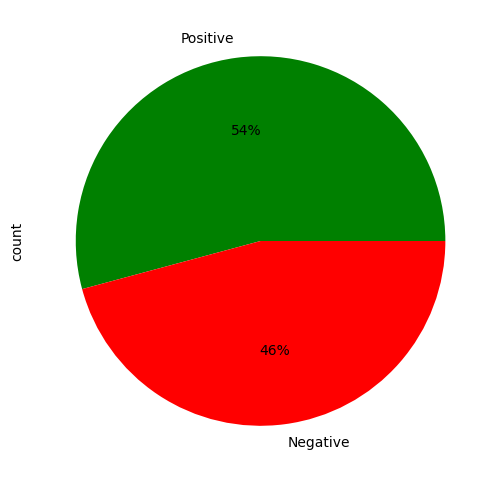

In [252]:
plt.figure(figsize=(8,6))
Apple_tweets.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["green","red"])
plt.show()

In [253]:
Apple_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tweet         1181 non-null   object 
 1   Avg           1181 non-null   float64
 2   totalwords    1181 non-null   int64  
 3   word_count    1181 non-null   int64  
 4   char_count    1181 non-null   int64  
 5   avg_word      1181 non-null   float64
 6   stopwords     1181 non-null   int64  
 7   hashtags      1181 non-null   int64  
 8   numerics      1181 non-null   int64  
 9   upper         1181 non-null   int64  
 10  upper_letter  1181 non-null   int64  
 11  Sentiment     1181 non-null   object 
dtypes: float64(2), int64(8), object(2)
memory usage: 110.8+ KB


In [254]:
processed_features = Apple_tweets.iloc[:, 0].values
labels = Apple_tweets.iloc[:, 11].values

In [255]:
processed_features

array(['say, far best customer care service ever received! @apple @appstore',
       'ios 7 fricking smooth & beautiful!! #thanxapple @apple',
       'love u @apple', ..., '@apple freaking cows freak',
       "@apple hate phone working i'm going freak",
       "@agounalakis that's nasty! @apple nasty brat"], dtype=object)

In [256]:
labels

array(['Positive', 'Positive', 'Positive', ..., 'Negative', 'Negative',
       'Negative'], dtype=object)

## TfidfVectorizer
Term Frequency-Inverse Document Frequency vectorizer is commonly used to convert textual content into numerical vectors.
Term Frequency measures how frequently a term appears in a document.TF is specific to each document.
Inverse Document Frequency measures how important a term is across documents. Terms that are common across many documents will have a lower IDF value, while terms that are rare will have a higher IDF value.
TF-IDF Vectorization indicates how important a word is to a document in a collection of corpus. 
TF-IDF scores are then used as features for training machine learning models and other analytical tasks. 
The higher the TF-IDF score of a term in a document, the more important that term is to that document.

More here - https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [258]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8)
processed_features = vectorizer.fit_transform(processed_features).toarray()

min_df(minimum document frequency) is used to ignore terms that have a document frequency strictly lower than the given threhold. For example, if min_df is set to 7, a term will only be included in the vocabulary if it appears in atleast 7 documents in the corpus. 
max_df(maximum document frequency) is used to ignore terms that have a document frequency strictly higher than the given threshold. For example, if max_df is set to 0.8, a term will be ignored if it appears in more than 80% of the documents in the corpus.

In [260]:
vectorizer

TfidfVectorizer(max_df=0.8, max_features=2500, min_df=7)

In [263]:
## Extra Knowledge Bytes (TF-IDF)

# Let's see how our TD-IDF looks like (sorting by the feature named 5s)
# Creating the TF-IDF with the feature names given by the TFIDF vectorizer, sorting it for unerstanding.
# Let's chain the .head() method on the DataFrame to inspect the first few observations of the TD-IDF sorted by '5s'
pd.DataFrame(processed_features, columns = vectorizer.get_feature_names_out()).sort_values(by = '5s', ascending=False).head()

,10,18xc8dk,4sq,5c,5s,7evenstarz,actually,all,already,always,...,would,wow,wtf,ya,year,yes,yet,yo,yooo,you
742,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.000000,0.802700,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
509,0.0,0.0,0.0,0.000000,0.802700,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
761,0.0,0.0,0.0,0.000000,0.802700,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297,0.0,0.0,0.0,0.395823,0.711077,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train-Test split

In [265]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.3, random_state=0)

In [266]:
y_train

array(['Negative', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Negative',
       'Negative', 'Positive', 'Negative', 'Negative', 'Negative',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Negative', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Negative', 'Positive', 'Negative', 'Negative', 'Positi

# Gaussian Naive Bayes
A Gaussian Naive Bayes(GNB) classifier is a variant of the Naive Bayes algorithm that assumes the features(or attributes) follow a Gaussian(normal) distribution. It's particularly suited for classification tasks. 

In [268]:
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [269]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [270]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

0.774818401937046
[[201 165]
 [ 21 439]]
              precision    recall  f1-score   support

    Negative       0.91      0.55      0.68       366
    Positive       0.73      0.95      0.83       460

    accuracy                           0.77       826
   macro avg       0.82      0.75      0.75       826
weighted avg       0.81      0.77      0.76       826



In [271]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report

0.6676056338028169
[[ 91  84]
 [ 34 146]]
              precision    recall  f1-score   support

    Negative       0.73      0.52      0.61       175
    Positive       0.63      0.81      0.71       180

    accuracy                           0.67       355
   macro avg       0.68      0.67      0.66       355
weighted avg       0.68      0.67      0.66       355



#### Since the sentiment is balanced we will consider Accuracy as model evaluation metric to measure the performance of the model.
#### Whenever the accuracy metric is used, we aim to learn the closeness of a measured value to a known value.

**Pl. note - Model building is an iterative process. Model performance both on the test and train dataset can be improved using feature engineering, feature extraction, hyper parameter tuning (including combination of various parameters).** 

**Model has to match the business objective and hence various permutation and combinations can be tried on to refine the model**

## Creating a Wordcloud

In [275]:
# Recall Apple_Tweets['Tweet'] from above. It has been processed at a basic level!

Apple_tweets['Tweet'].iloc[30:31] #Checking a tweet at random!

30    dear @apple, love new default alarm ringtone. ...
Name: Tweet, dtype: object

In [276]:
# Removing symbols and punctuations 
# further_clean = Apple_tweets['Tweet'].str.replace('[^\w\s]','')

# Extending the list of stop words (including words like Apple, bitly, dear, please, etc.)
stop_words = list(stopwords.words('english'))
stop_words.extend(["apple", "http","bit","bitly","bit ly", "dear", "im", "i'm", "please"])

In [277]:
#Removing stop words (extended list as above) from the corpus 

corpus = Apple_tweets['Tweet'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus

0       say, far best customer care service ever recei...
1       ios 7 fricking smooth & beautiful!! #thanxappl...
2                                           love u @apple
3       thank @apple, loving new iphone 5s!!!!! #apple...
4         .@apple best customer service. new phone 10min!
                              ...                        
1176                                         freak @apple
1177    cant freaking see pictures tl annoyed freak @t...
1178                           @apple freaking cows freak
1179                @apple hate phone working going freak
1180         @agounalakis that's nasty! @apple nasty brat
Name: Tweet, Length: 1181, dtype: object

In [278]:
wc_a = ' '.join(corpus)

Word Cloud for Apple_Tweets (after cleaning)!!


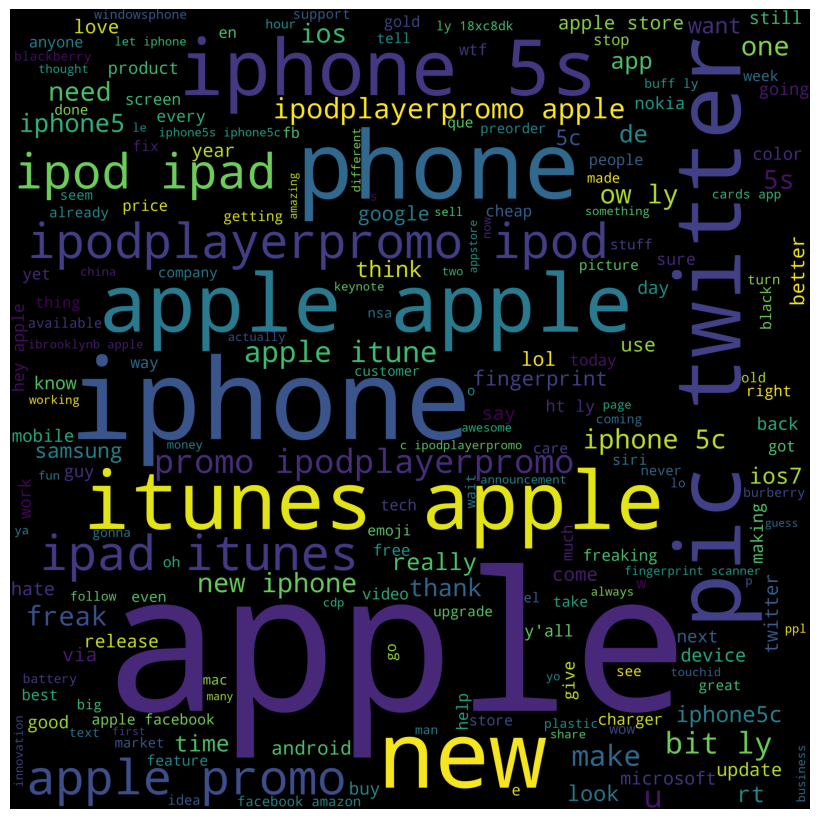

In [279]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Apple_Tweets (after cleaning)!!")
plt.show()

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud fuction!

As the data was collected at the begining of the new iphone launch, it is already indicated by words 'new' and 'iphone' or 'phone'. We can add these words to stop words list and rebuid the word cloud to find some interesting insights

# END